# Data mobility analysis 

In [16]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sparse
from scipy.spatial import distance




# read all files from the repository

filerepo = 'data_mobility/zipped_mobility' # repository with files
filename = "data_mobility/part-00039-a99a7773-0aac-4a7c-b8af-7a1b071437a0-c000.csv.gz" # example of a name
filename2 = str(filerepo) + "/part-00001-a99a7773-0aac-4a7c-b8af-7a1b071437a0-c000.csv.gz"

datamob = pd.read_csv(filename, compression='gzip')
#datamob.head()

#datamob2 = pd.read_csv(filename2, compression='gzip')
#datamob2.head()

#trip about data 

data_trip = datamob.loc[datamob['tripIndex'] == 13149]

#data_trip.head()

#plot_trajec(data_trip)#(datamob)
datamob.shape




In [4]:
import folium



def plot_trajec(df):
    '''
    function to plot trajectories from dataframe df ATTENTION: plots all in connection!! 
    df has standard structure tripIndex	lat	lon	time
    
    plot trajectories corresponding to different tripindex separately
    '''
    size = int(df.shape[0])
    
    #choose the same trip
    
    lat = np.array(df.lat.values)
    lon = np.array(df.lon.values)

    #colors = # color per tripindex  #np.random.rand(size)
    area = (30 * np.random.rand(size))**2  # 0 to 15 point radii
    
    #area = #proportional to the distance to the tree
    #color = # green if next to the tree

    #plt.figure(figsize=(10,10), dpi=80)    
    plt.scatter(lat, lon) #c = colors) #, s = area) # 
    #for ind in range(0, size):
    
    plt.plot(lat,lon, '-')
        
    

def plot_traj_folium(df):
    ''' function to visusalise trajectories on a map
    input:
    lat_values = df.latitude.values
    lon_values = df.longitude.values'''
    
    latitude = df.lat.values
    longitude = df.lon.values

    #then we zip two arrays of lat, lon of datapoints
    latlon1 = list(zip(latitude, longitude))


    #We put map to show first location of Paris 48.8566° North, 2.3522° est
    mapit = folium.Map( location=[48.75 , 2.35], zoom_start=6 )
    for coord in latlon1:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )
    mapit


    #draw connecting line between locations written in latlon file

    trips = df.tripid # different trips
    array_trip = np.unique(trips) 


    #for ind, c in zip(ind_len, colors): 
    '''
    for ind in range(len(array_trip)):
        df_trip = df[df.tripid == array_trip[ind]]
        shape =df_trip.shape 
    
        latitude1 = df_trip.latitudestart.values
        longitude1 = df_trip.longitudestart.values

        #then we zip two arrays of lat, lon of datapoints
        latlon1 = list(zip(latitude1, longitude1))

    
        size = shape[0]
    SAF=folium.PolyLine(locations=latlon1,weight=5,color = 'r')#color_array[ind])
    mapit.add_child(SAF)
    '''
    #plt.show()


In [5]:
# saving files to one CSV format 
#np.savetxt('data_traject_excample.csv', (datamob.tripIndex.values, datamob.lat.values, datamob.lon.values, datamob.time.values), delimiter=',')

#datamob.to_csv('data_traject_excample.csv')

# Plotting different indices

total number of trees  657


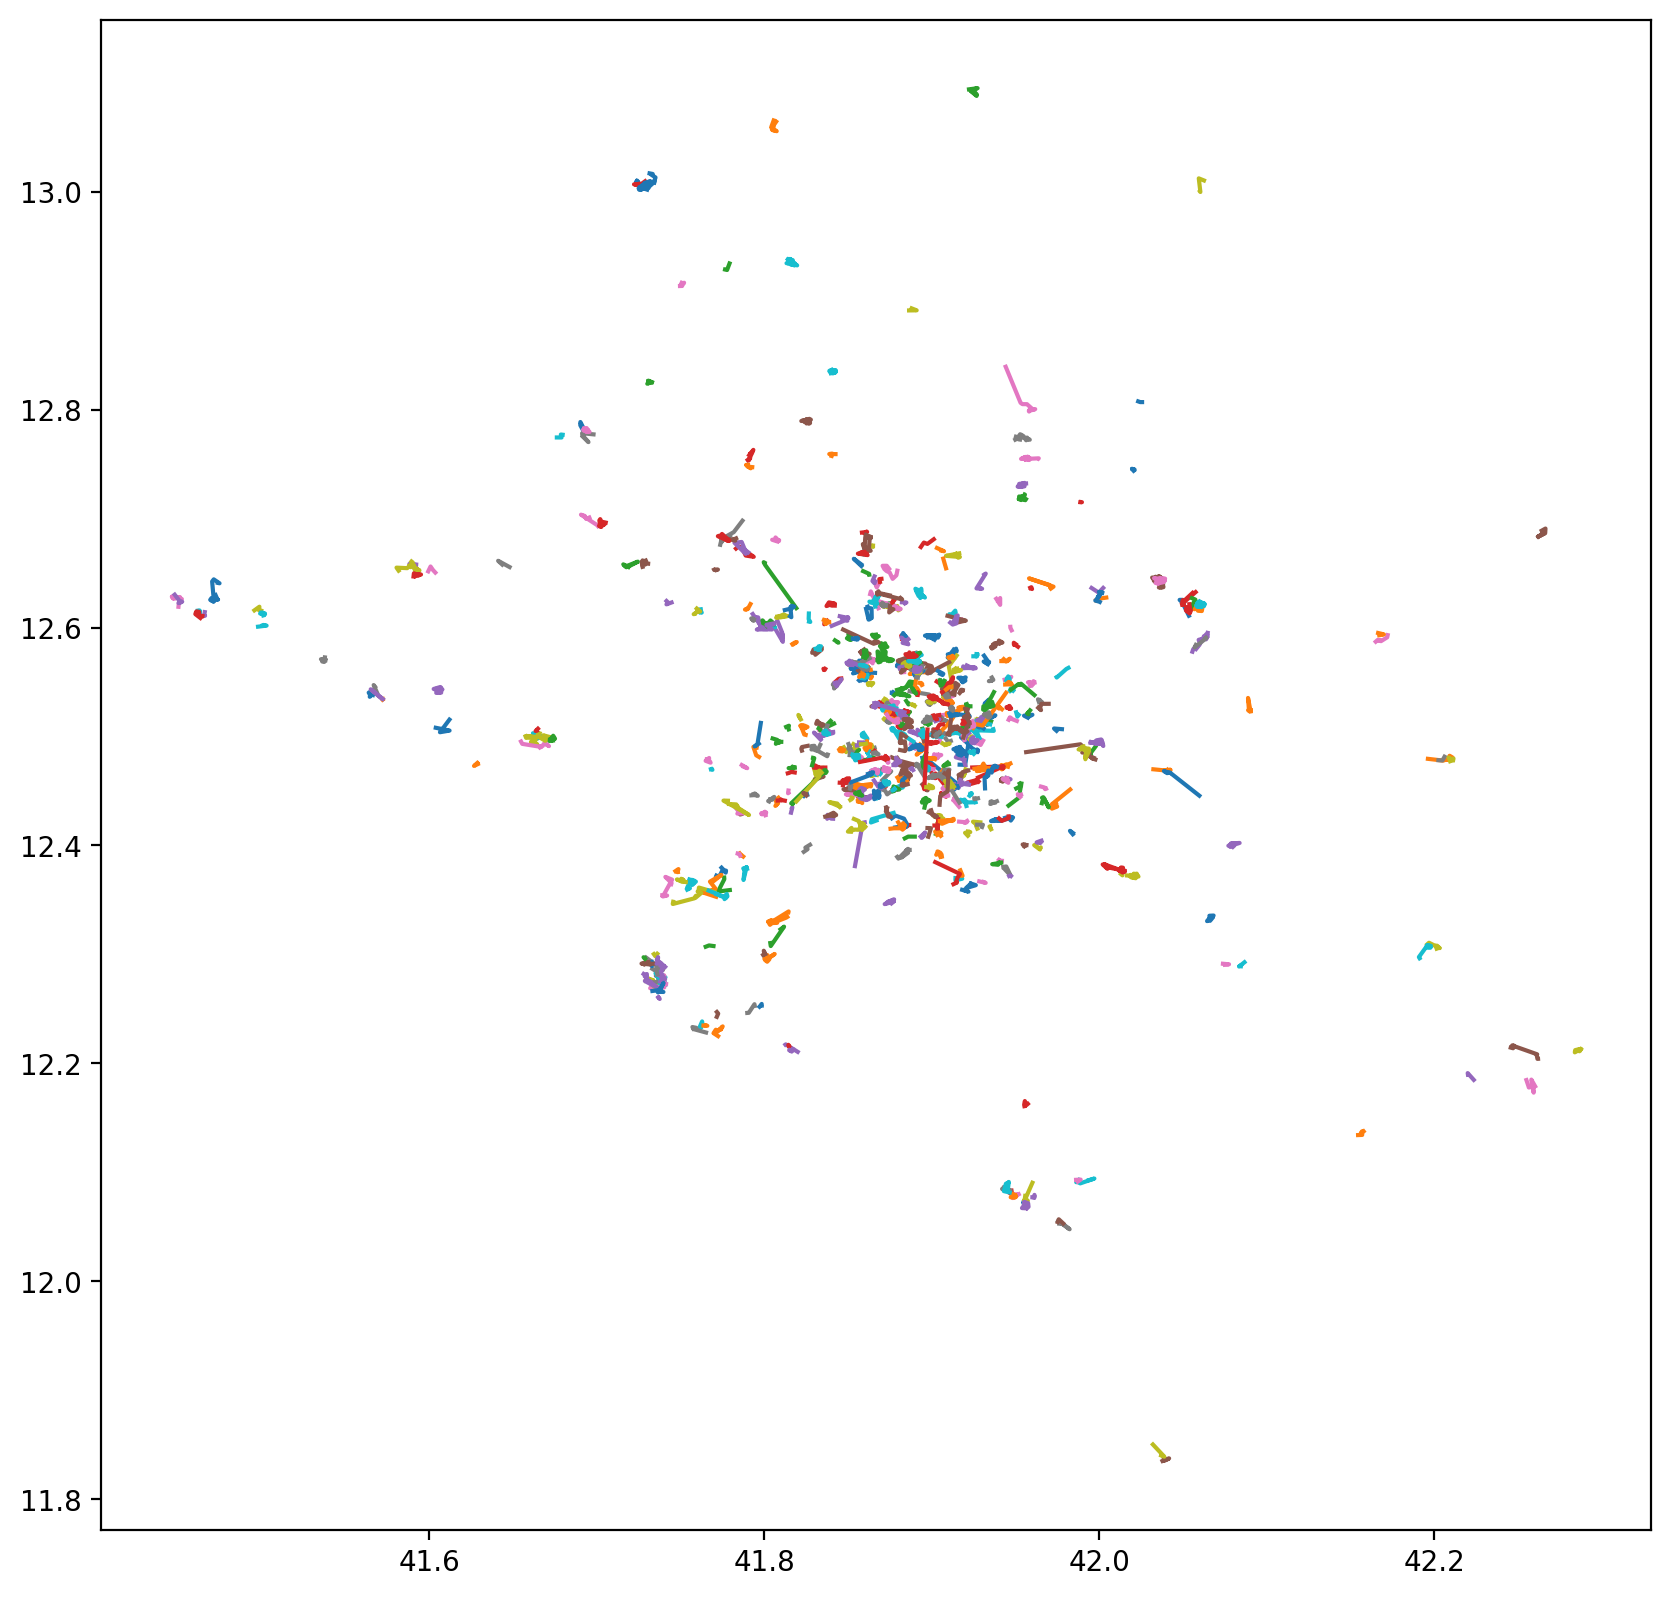

In [13]:
# loop through all unique indices 

trips = datamob.tripIndex # different trips per file
array_un_trip = np.unique(trips) 
print('total number of trees ',np.size(array_un_trip))
num_uniq_trip = np.size(array_un_trip)


plt.figure(figsize=(10,10), dpi=200)  # generate figure for plotting all trajectories
for ind in range(0, num_uniq_trip):
    tripind = array_un_trip[ind]
    # df for the unique trip 
    #print(tripind)
    data_trip = datamob.loc[datamob['tripIndex'] == tripind]
    
    
    # plotting
    lat = np.array(data_trip.lat.values)
    lon = np.array(data_trip.lon.values)
    plt.plot(lat,lon, '-')
    
    #plot_all_trajec(data_trip)
plt.show()

# Analysis of trajectories

Estimate distributions:
1. distribution of jumps 
2. identify longest trips, greenest trips 

In [28]:
trips = datamob.tripIndex # different trips per file
array_trip = np.unique(trips) 
print(np.size(array_trip))


657


In [17]:
def jump_dist_Ndim_space(traj,pos,Mat):
    
    j_dist = []
    
    for i in range(len(traj)-1):
        
        s,t=traj[i],traj[i+1]
        p1 = pos[s]
        p2 = pos[t]
        
        eucl = np.sqrt(np.sum((Mat[p2]-Mat[p1])**2))
        j_dist.append(eucl)

    return j_dist


def distance_distrib(X_arr, Y_arr):
    # estimate distance for arrays from data on coordinates 
    
    coords = list(zip(X_arr,Y_arr))
    

    #coords_1 = (52.2296756, 21.0122287)
    #coords_2 = (52.406374, 16.9251681)

    #dist = geopy.distance.geodesic(coords_1, coords_2).km
    
    dist_distr = distance.cdist(coords, coords, 'euclidean')
    return dist_distr


def z_scoreD(dist_vec):

    u,sig = np.mean(dist_vec),np.std(dist_vec)
    zscore = list(map(lambda x:(x-u)/sig,dist_vec))

    return zscore


"\nzscore = z_scoreD(dist_arr)\nplt.hist(zscore,bins=100,density=True,label='zscore distribution sample')\nplt.xlabel('zscore of subsample', fontsize=12,fontweight='bold')\nplt.ylabel('frequency', fontsize=12,fontweight='bold')\nplt.legend()\n"

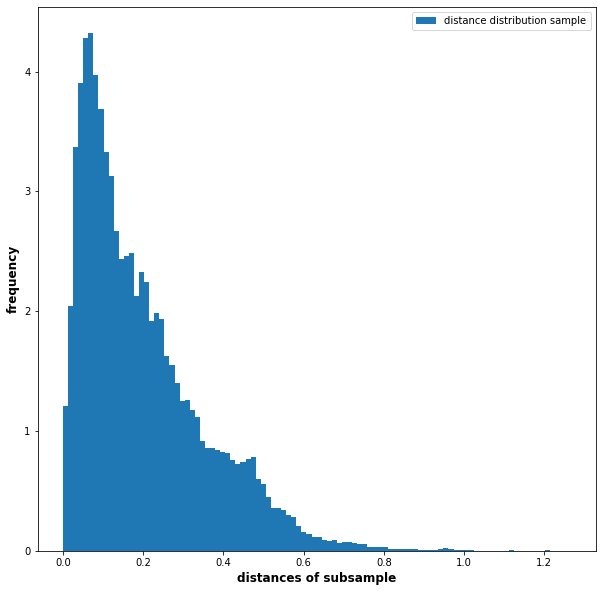

In [18]:

X_arr = datamob.lat.values
Y_arr = datamob.lon.values
dist_arr = distance_distrib(X_arr, Y_arr)


fig = plt.figure(figsize=(10,10))
dist_arr.flatten()
plt.hist(dist_arr.flatten(),bins=100,density=True,label='distance distribution sample')
plt.xlabel('distances of subsample', fontsize=12,fontweight='bold')
plt.ylabel('frequency', fontsize=12,fontweight='bold')
plt.legend()


'''
zscore = z_scoreD(dist_arr)
plt.hist(zscore,bins=100,density=True,label='zscore distribution sample')
plt.xlabel('zscore of subsample', fontsize=12,fontweight='bold')
plt.ylabel('frequency', fontsize=12,fontweight='bold')
plt.legend()
'''